# 카이제곱검정(Chi-square test, Crosstabs)

명목/서열척도와 같은 범주형 변수들 간의 연관성을 분석

변수들 간의 범주를 동시에 교차하는 교차표를 만들어서 서열척도로 변환하여 사용한다

각각의 빈도와 비율을 통해 변수 상호간의 독립성과 관련성을 분석함

In [1]:
import scipy.stats
from scipy.stats import chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/smoker
df = pd.read_csv("datasets/smoker.csv")

# 데이터 샘플 확인 # 성별 정보와 흡연
df.head()

,sex,smoke
0,male,Non-Smoker
1,male,Smoker
2,male,Non-Smoker
3,male,Smoker
4,male,Non-Smoker


In [4]:
# 항목별 집계
df.groupby(['sex','smoke'])['smoke'].count()

# 여자 흡연자 12, 비흡연자 50 ... 

sex     smoke     
female  Non-Smoker    50
        Smoker        12
male    Non-Smoker    40
        Smoker        29
Name: smoke, dtype: int64

In [5]:
# 카이제곱 검정용 데이터셋 가공

crosstab = pd.crosstab(df.sex,df.smoke)
crosstab

# 기존 데이터를 카이제곱 검정용 데이터로 가공한다. crosstab() 함수를 사용하여 교차표 형태로 데이터를 가공

smoke,Non-Smoker,Smoker
sex,,
female,50,12
male,40,29


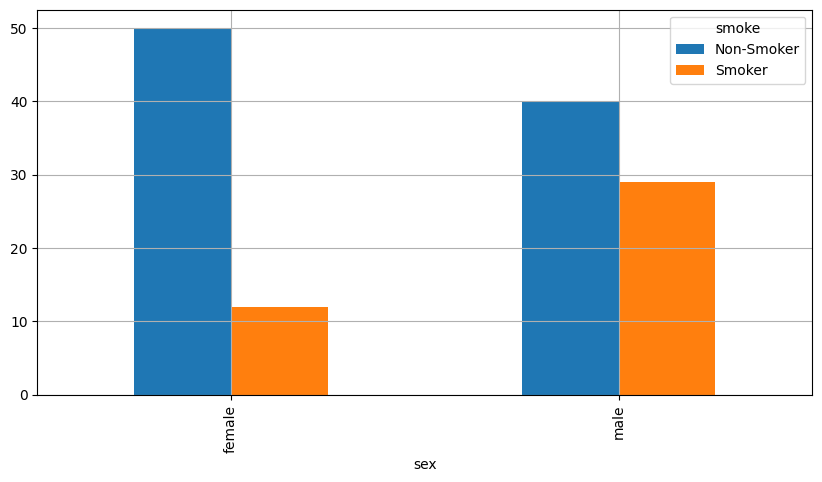

In [6]:
# 성별 흡연자 수 시각화

crosstab.plot(kind='bar',figsize=(10,5))
plt.grid()
plt.show()
plt.close()

# 남성과 여성의 흡연자 비율 차이가 큰데 이게 통계적으로 유의미한 차이인지 검정 수행

In [7]:
# 카이제곱 검정 수행

chiresult = chi2_contingency(crosstab,correction=False)
print('Chi Square',chiresult[0])
print('P-value',chiresult[1])

# p-value가 0.05 보다 작으므로 성별에 따른 흡연자의 비율 차이가 통계적으로 유의함


Chi Square 7.8081404703715105
P-value 0.005201139711454792
